In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Stock Headlines.csv",encoding='ISO-8859-1')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [3]:
df.shape

(4101, 27)

**Note:** Here the "label" column is in a binary which consist 0-stock proce goes down or stays the same, 1 - stock price goes up

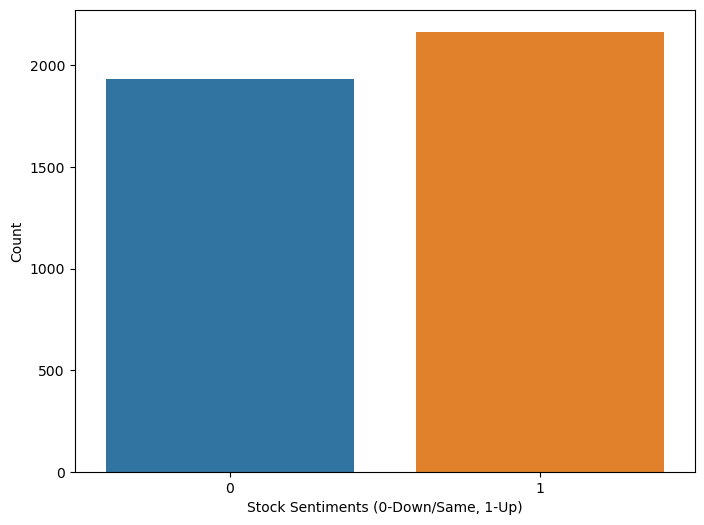

In [4]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,6))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

# Data Cleaning & Preprocessing

In [5]:
df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [6]:
# Droping nan values
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [7]:
df_copy=df.copy()

In [8]:
df_copy.reset_index(inplace=True)

In [9]:
# Splitting the dataset into train and test
train=df_copy[df_copy['Date']<'20150101']
test=df_copy[df_copy['Date']>'20141231']
print('Train size : {}, Test size: {}'.format(train.shape,test.shape))

Train size : (3972, 28), Test size: (378, 28)


In [10]:
# splitting the dataset
y_train=train['Label']
train=train.iloc[:,3:28]
y_test=test['Label']
test=test.iloc[:,3:28]

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
# Removing the punctuation ans special characters form the text
train.replace(to_replace='[^a-zA-Z]',value=' ',regex=True,inplace=True)
test.replace(to_replace='[^a-zA-Z]',value=' ',regex=True,inplace=True)

In [13]:
# Renaming columns
new_columns=[str(i) for i in range(0,25)]
train.columns=new_columns
test.columns=new_columns

In [14]:
# converting the entire text into lower
for i in new_columns:
    train[i]=train[i].str.lower()
    test[i]=test[i].str.lower()

In [15]:
# joining all the columns
train_headlines=[]
test_headlines=[]

for row in range(0,train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[row,0:25]))

for row in range(0,test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row,0:25]))
    


In [16]:
train_headlines[5]

'fifth round draw bbc unveils secret weapon in ratings war  south melbourne second division round up european round up third division round up welfare could claim killie tie as caley thistle land celtic ferguson puts brave face on rio meltdown southgate in striking form to pre empt penalties second bite for wolves scallywags have chelsea looking to the bench england miss a trick for centurion radio just in time for england batting collapse faith in the future youth at the helm until it goes under united stave off inevitable time warner and aol to merge keep up waging global war desktop icons  no    the qwerty keyboard the sec s files the low down  workplace bullying met  not equipped  to solve murders tranmere tie will not be replayed rebel attacks take toll on russia met lent stopped car to lawrence'

In [17]:
test_headlines[4]

'new charlie hebdo issue to come out next week   it s very hard  we are all suffering  with grief  with fear  but we will do it anyway because stupidity will not win   ahmed merabet  cop killed in paris attacks  was muslim youngest suspect in charlie hebdo attack turns himself in grenades thrown at a mosque in le mans  west of paris danish newspaper to print charlie hebdo cartoons on islam muslim politician from india offers   m to charlie hebdo attackers vladimir putin has condemned a deadly terrorist attack in paris  and confirmed moscows readiness to continue cooperation with france in battling terrorism  putin also expressed his condolences to the victims  families and wished the injured a speedy recovery  turkey is trying to hide any evidence that holds turkish leaders responsible for the support of terrorist groups  especially the islamic state of iraq and syria  isis   turkish media is reporting  danish paper that published    muhammad cartoons boosts security two charlie hebdo 

In [18]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
    
    # Tokenizing the news-title by words
    words = train_headlines[i].split()

    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    headline = ' '.join(words)

    # Building a corpus of news-title
    train_corpus.append(headline)

In [19]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
    # Tokenizing the news-title by words
    words = test_headlines[i].split()

    # Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]

    # Stemming the words
    words = [ps.stem(word) for word in words]

    # Joining the stemmed words
    headline = ' '.join(words)

    # Building a corpus of news-title
    test_corpus.append(headline)

In [20]:
train_corpus[:4]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

In [21]:
test_corpus[:2]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [22]:
down_words=[]
for i in list(y_train[y_train==0].index):
    down_words.append(train_corpus[i])
    
up_words=[]
for i in list(y_train[y_train==1].index):
    up_words.append(train_corpus[i])

In [24]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


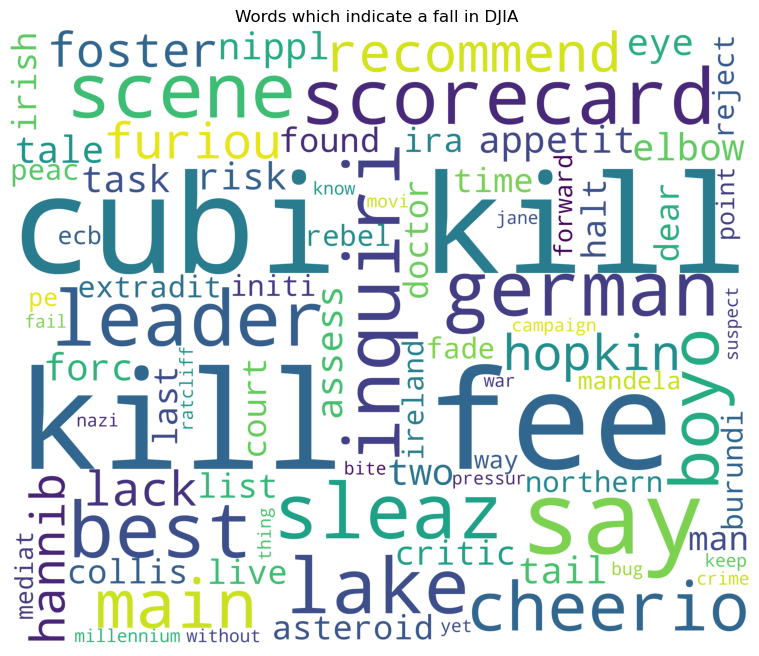

In [25]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(16,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

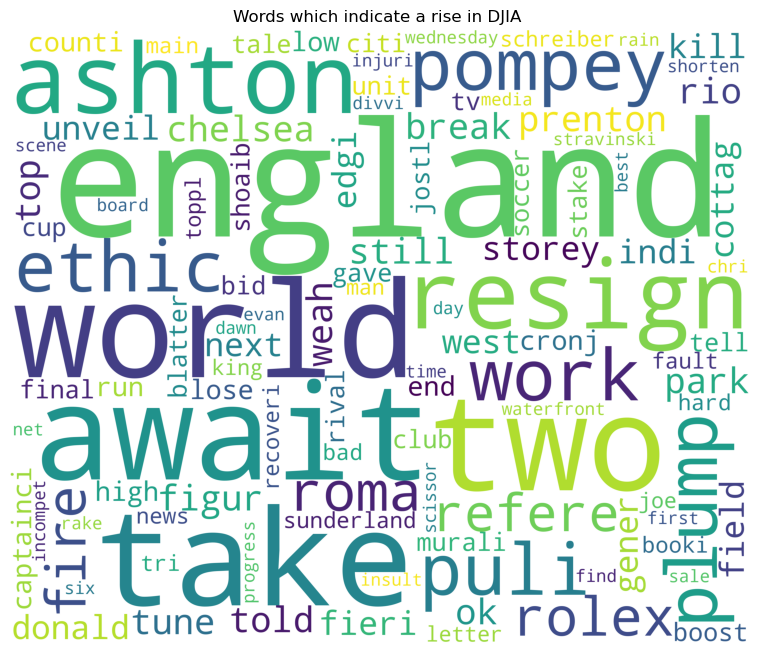

In [26]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(16,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()


In [27]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

# Model Building       
<!--  -->           
### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

lr_y_pred = lr_classifier.predict(X_test)

In [29]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


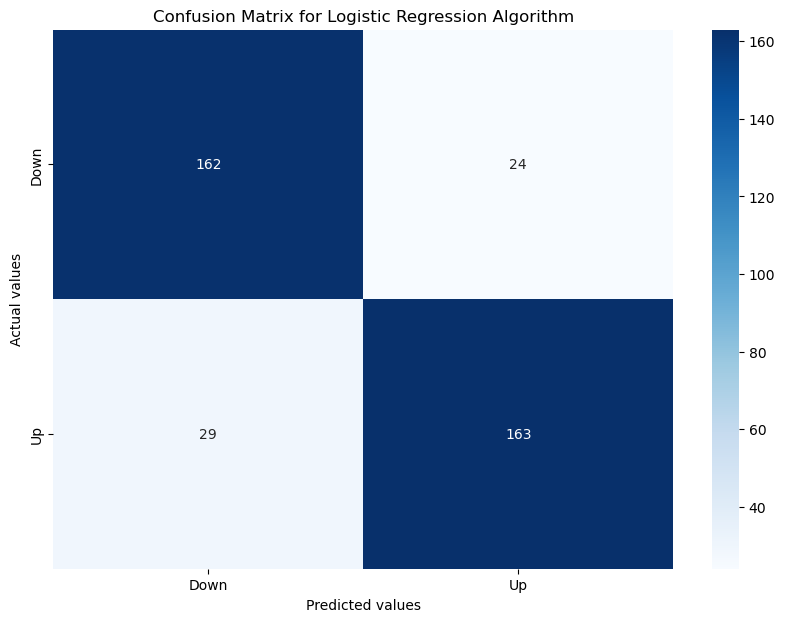

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues",fmt='g', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)

In [32]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.6%
Precision score is: 0.83
Recall score is: 0.85


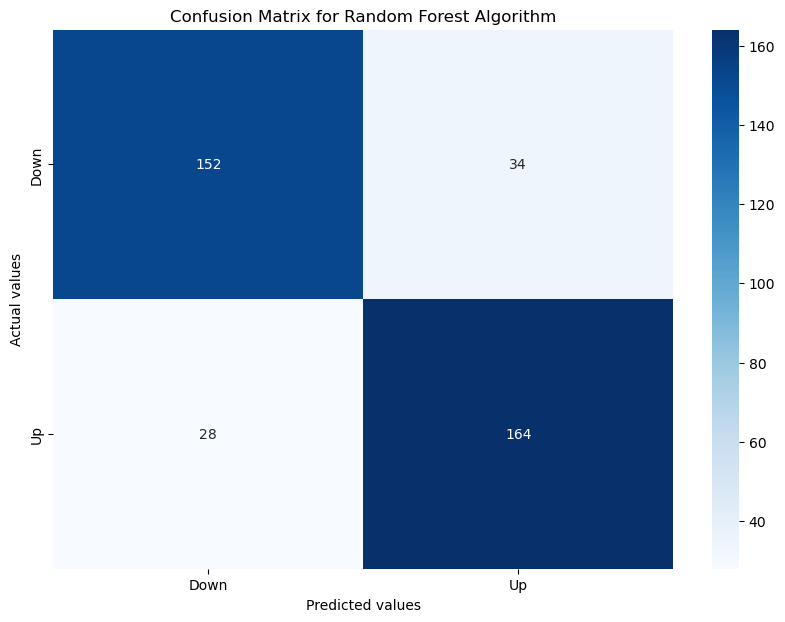

In [33]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues",fmt='g', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

### Multinomial Bayes Theroem

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [35]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


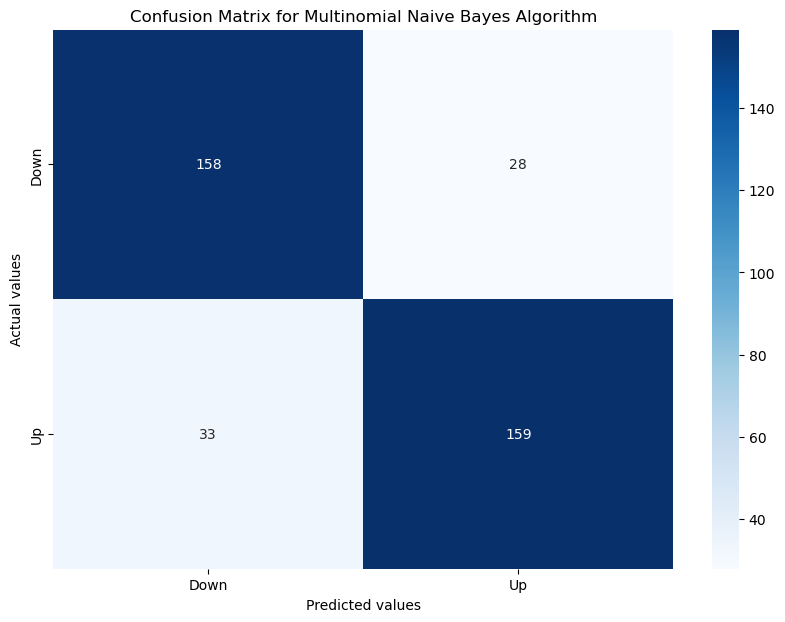

In [36]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues",fmt='g', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

# Prediction

In [37]:
import re

def stock_prediction(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)

    temp = cv.transform([final_news]).toarray()
    return lr_classifier.predict(temp)

In [38]:
# For generating random integer
from random import randint
sample_test = df_copy[df_copy['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [39]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
    print('Prediction: The stock price will remain the same or will go down.')
else:
    print('Prediction: The stock price will go up!')

News: EU law that could make UK internet porn filters illegal is heading for a vote
Prediction: The stock price will go up!


In [40]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
    print('Prediction: The stock price will remain the same or will go down.')
else:
    print('Prediction: The stock price will go up!')

News: Pope Francis has called for greater transparency in politics and said elections should be free from backers who fund campaigns in order to prevent policy being influenced by wealthy sponsors.
Prediction: The stock price will go up!


In [41]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
    print('Prediction: The stock price will remain the same or will go down.')
else:
    print('Prediction: The stock price will go up!')

News: Faced with a cash shortage in its so-called caliphate, the Islamic State group has slashed salaries across the region, asked Raqqa residents to pay utility bills in black market American dollars, and is now releasing detainees for a price of $500 a person.
Prediction: The stock price will go up!
